<a href="https://colab.research.google.com/github/nddheaa/Thyroid-Disease/blob/main/ThyroidDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thyroid Disease**

Age: The age of the patient at the time of diagnosis or treatment.

Gender: The gender of the patient (male or female).

Smoking: Whether the patient is a smoker or not.

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).

Hx Radiotherapy: History of radiotherapy treatment for any condition.
Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

T: Tumor classification based on its size and extent of invasion into nearby structures.

N: Nodal classification indicating the involvement of lymph nodes.

M: Metastasis classification indicating the presence or absence of distant metastases.

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

Recurred: Indicates whether the cancer has recurred after initial treatment.

# **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/Thyroid_Diff.csv')

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
# RRename Kolomnya agar lebih mudah dimenegrti
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [ ]:
#mengecek apakah ada nilai yang null
df.isnull().sum()
#karena tidak nilai yang null kita lanjut ketahap berikutnya

Age                                    0
Gender                                 0
Smoking                                0
Smoking History                        0
Radiotherapy History                   0
Thyroid Function                       0
Physical Examination                   0
Adenopathy                             0
Types of Thyroid Cancer (Pathology)    0
Focality                               0
Risk                                   0
Tumor                                  0
Lymph Nodes                            0
Cancer Metastasis                      0
Stage                                  0
Treatment Response                     0
Recurred                               0
dtype: int64

In [ ]:
df.duplicated().sum()

19

In [ ]:
#hapus data yang memiliki duplicate value
df.drop_duplicates()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [ ]:
#Replace The values with a more understandable values
df['Adenopathy'].replace({'No' : 'No Lympth Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)

df['Stage'].replace({'I' : 'First-Stage' , 'II' : 'Second-Stage' , 'III' : 'Third-Stage'} ,inplace = True)

df['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' ,
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has invaded nearby structures' ,
                     'T4b' : 'tumor that has invaded nearby structures'} , inplace =True)

df['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

df['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

<ipython-input-12-2ed7db84d5e5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tumor', y='Age', data=df, palette="OrRd", ax=axes[0])
<ipython-input-12-2ed7db84d5e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y='Age', data=df,palette="OrRd", ax=axes[1])


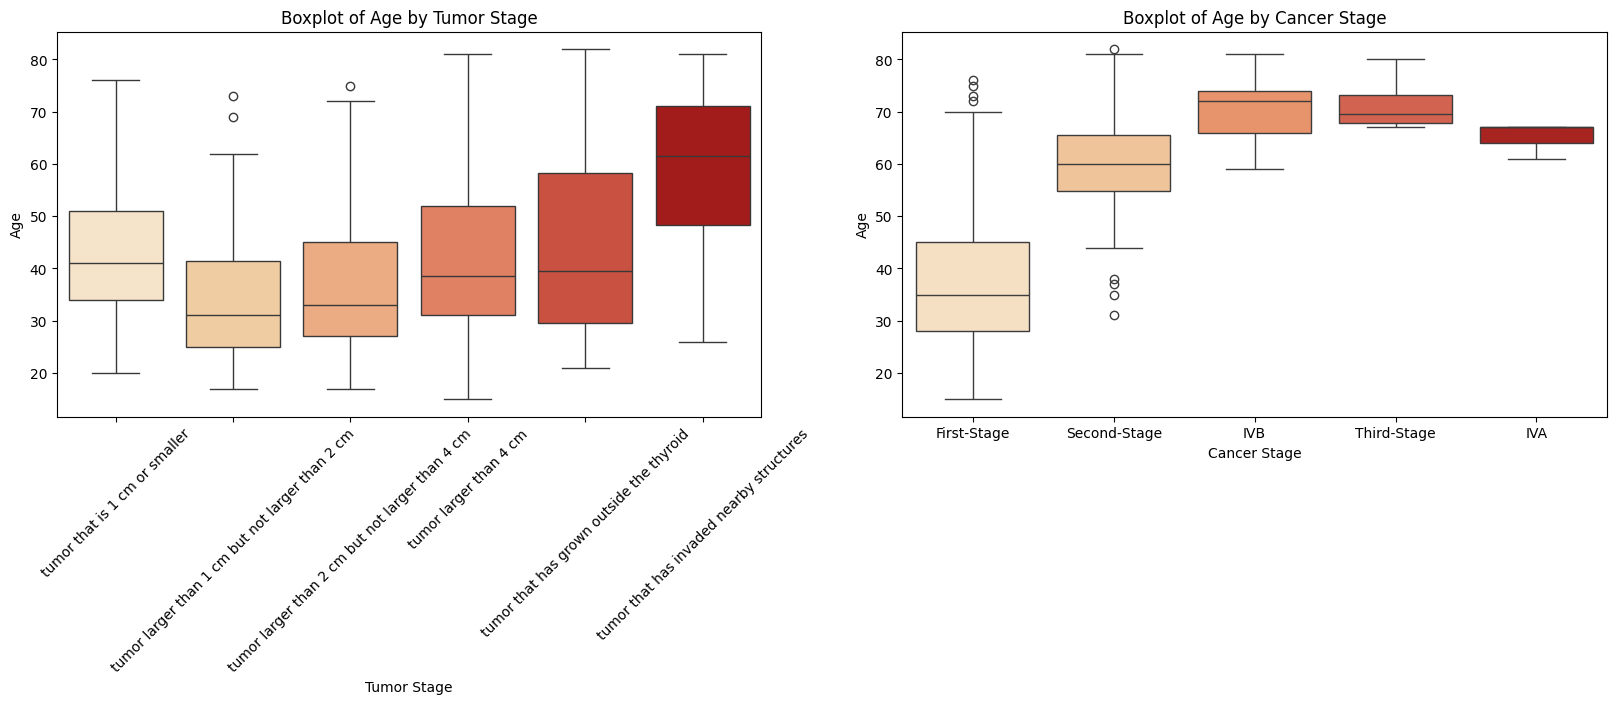

In [ ]:
#checking outlier
import matplotlib.pyplot as plt
import seaborn as sns
# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot for Tumor
sns.boxplot(x='Tumor', y='Age', data=df, palette="OrRd", ax=axes[0])
axes[0].set_title('Boxplot of Age by Tumor Stage')
axes[0].set_xlabel('Tumor Stage')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)
# Boxplot for Stage
sns.boxplot(x='Stage', y='Age', data=df,palette="OrRd", ax=axes[1])
axes[1].set_title('Boxplot of Age by Cancer Stage')
axes[1].set_xlabel('Cancer Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)

plt.show()

# **EDA**

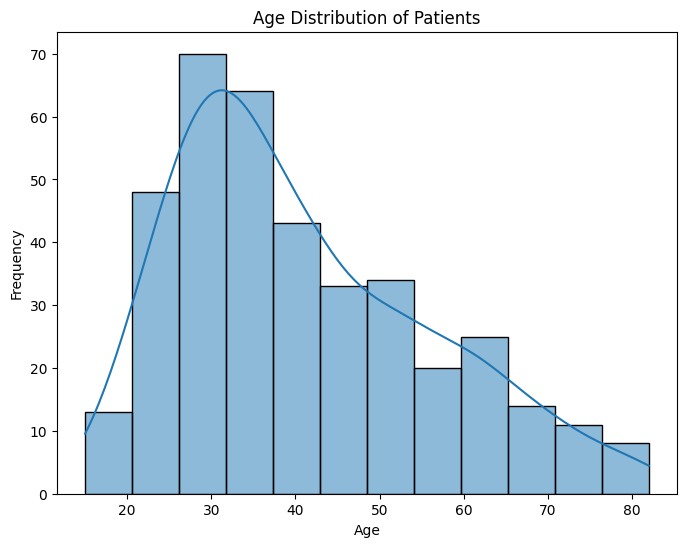

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

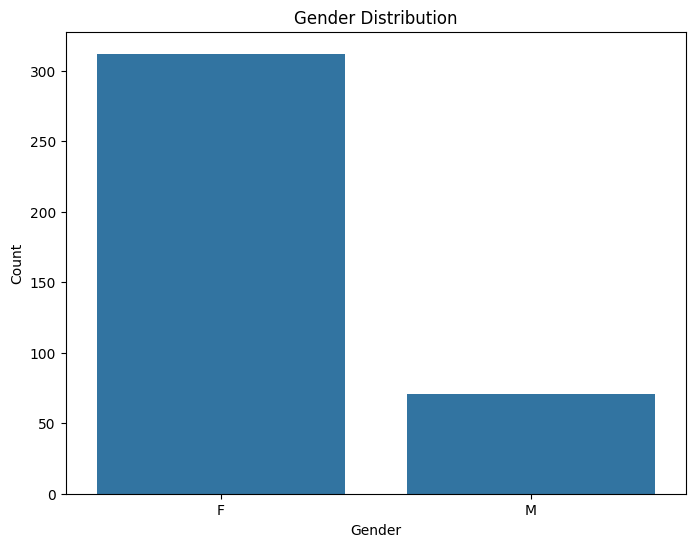

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

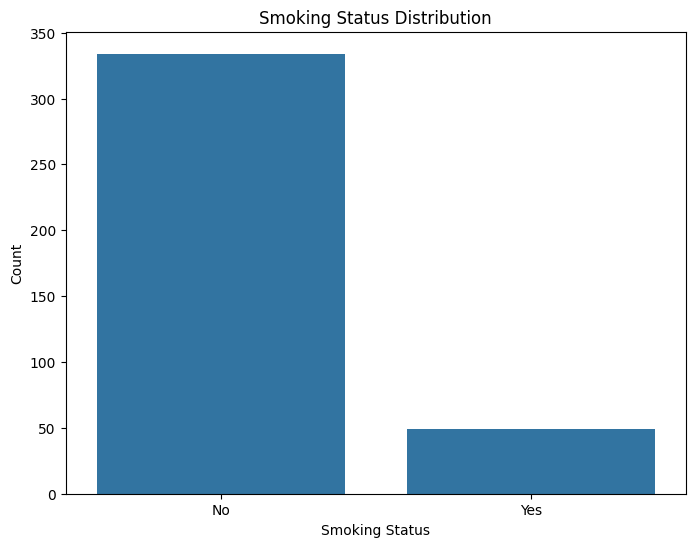

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=df)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

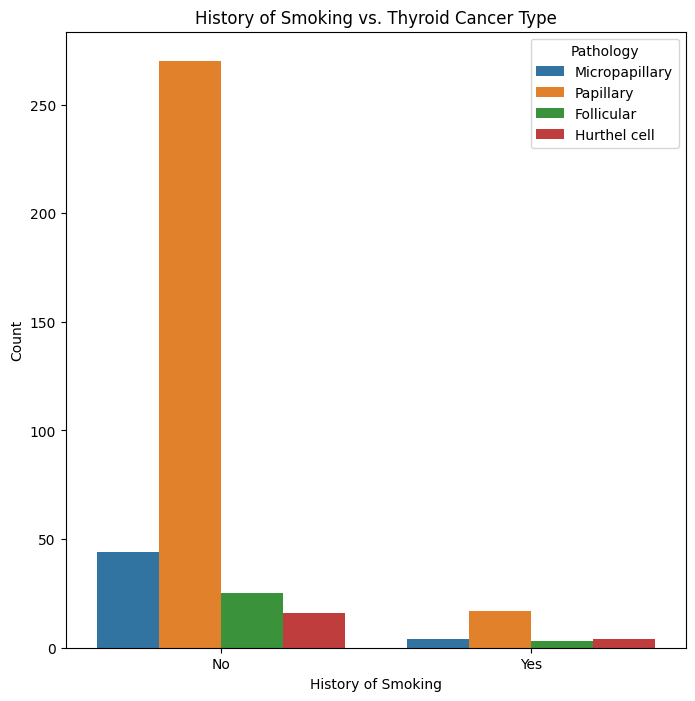

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Smoking History', hue='Types of Thyroid Cancer (Pathology)', data=df)
plt.title('History of Smoking vs. Thyroid Cancer Type')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.legend(title='Pathology')
plt.show()

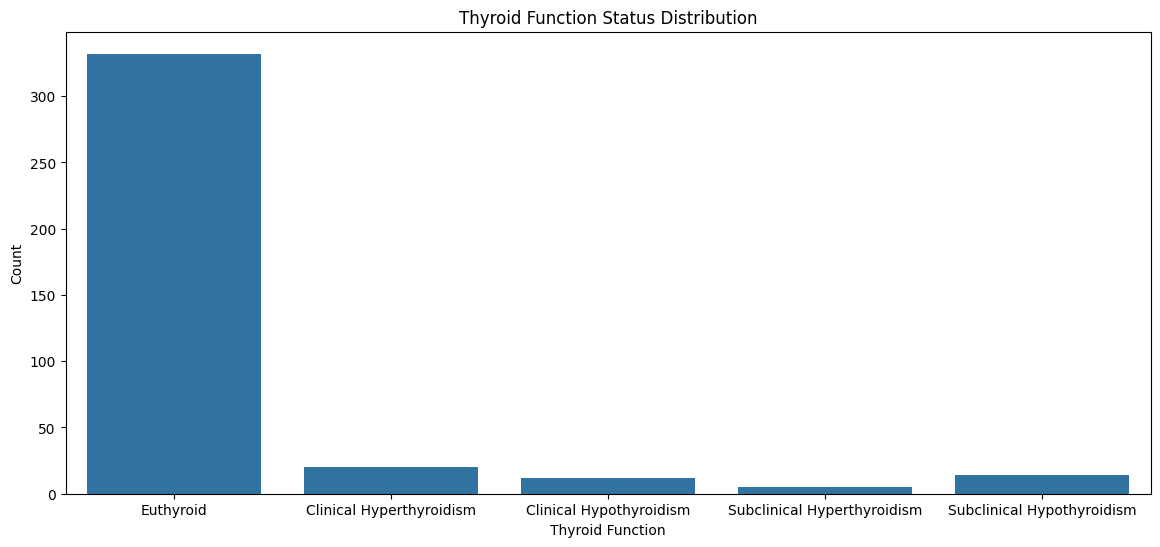

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Thyroid Function', data=df)
plt.title('Thyroid Function Status Distribution')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.show()

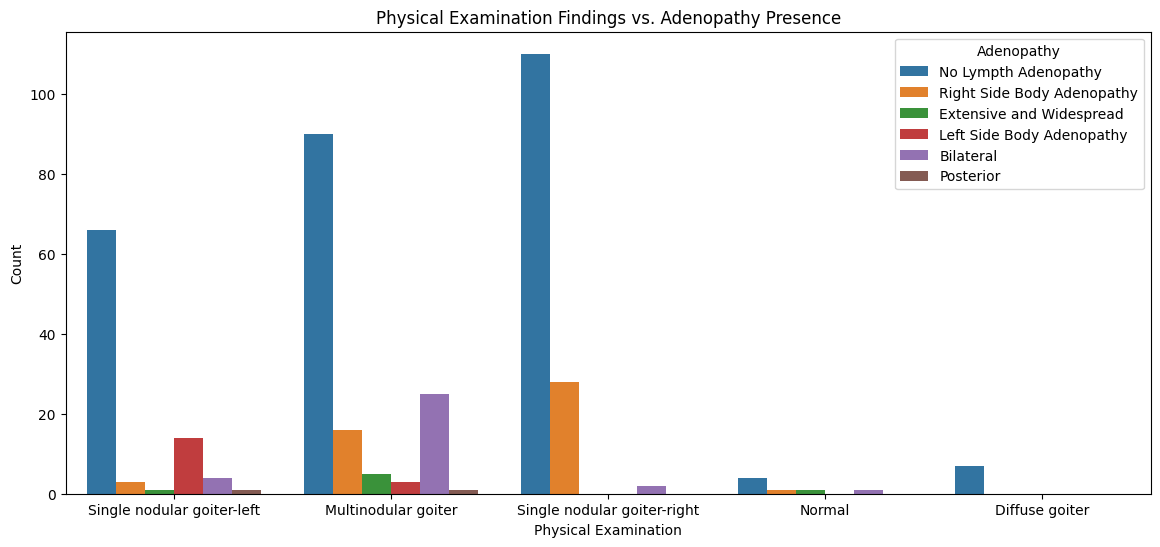

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Physical Examination', hue='Adenopathy', data=df)
plt.title('Physical Examination Findings vs. Adenopathy Presence')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.legend(title='Adenopathy')
plt.show()

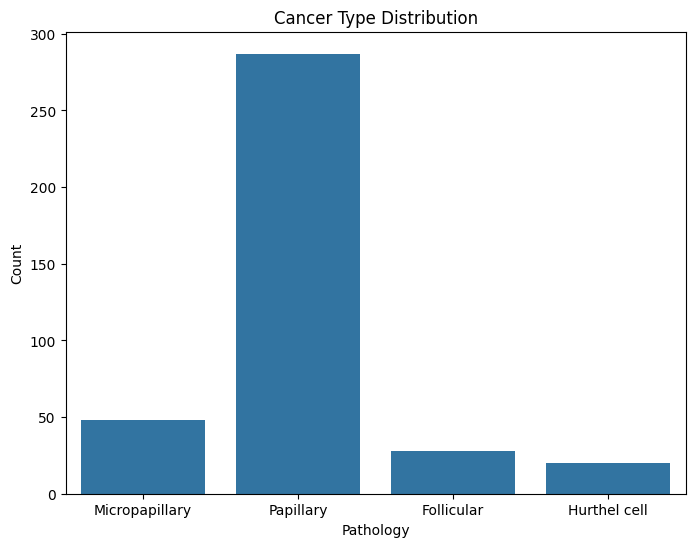

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Types of Thyroid Cancer (Pathology)', data=df)
plt.title('Cancer Type Distribution')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

# **Correlation Matrix**

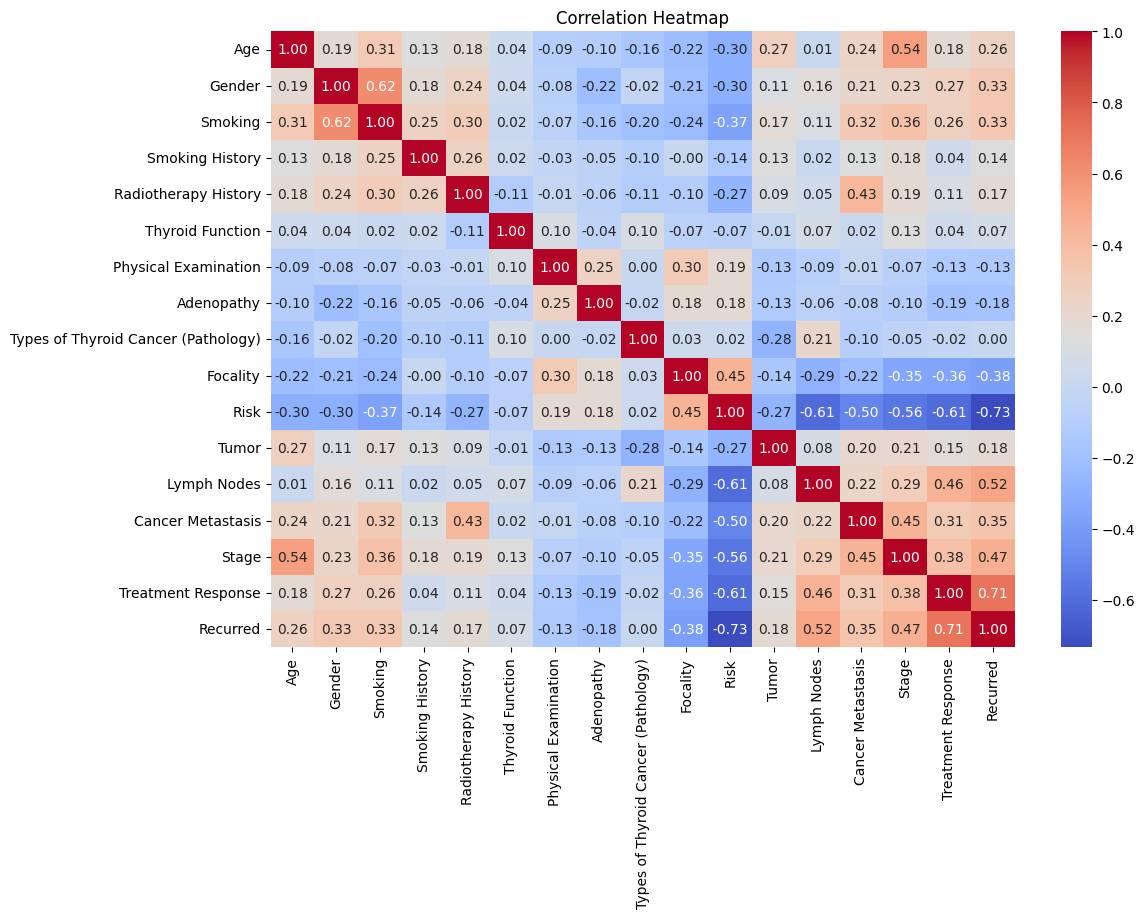

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Highly correlated features:
{'Stage', 'Smoking', 'Focality', 'Recurred', 'Treatment Response', 'Radiotherapy History', 'Cancer Metastasis', 'Risk', 'Age', 'Gender', 'Physical Examination', 'Lymph Nodes'}


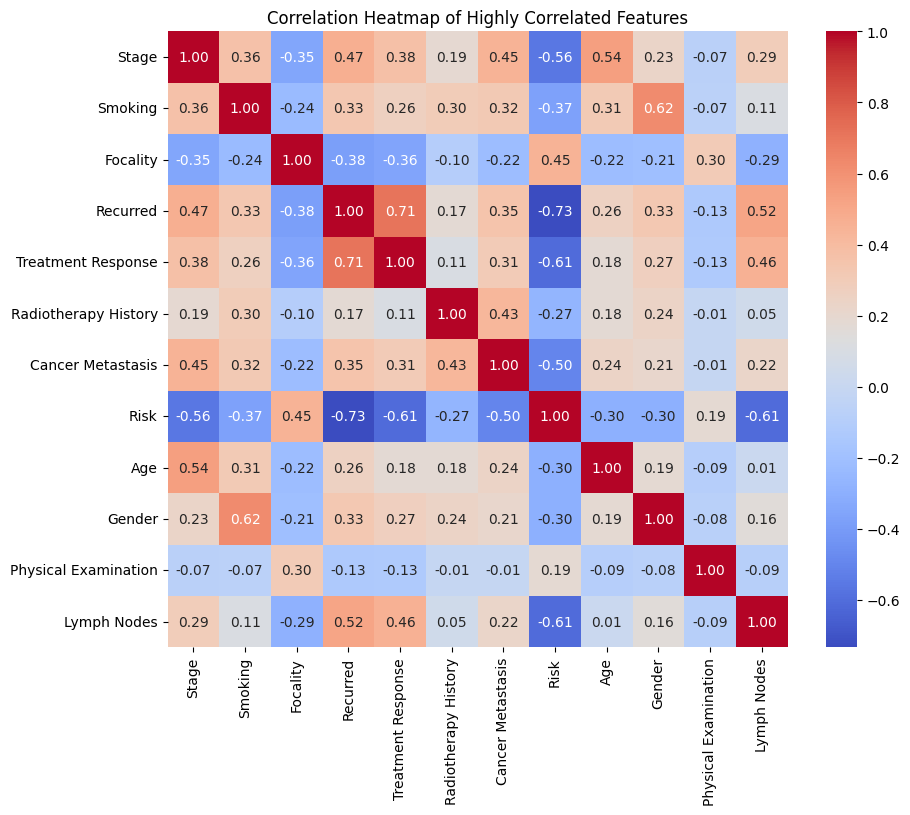

In [ ]:
# Filter hanya korelasi dengan nilai absolut di atas threshold tertentu
threshold = 0.3
high_correlation_pairs = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Cetak pasangan fitur yang berkorelasi tinggi
high_correlation_features = set()
for i in range(len(high_correlation_pairs.columns)):
    for j in range(i+1, len(high_correlation_pairs.columns)):
        if high_correlation_pairs.iloc[i, j]:
            high_correlation_features.add(high_correlation_pairs.columns[i])
            high_correlation_features.add(high_correlation_pairs.columns[j])

print("Highly correlated features:")
print(high_correlation_features)

# Ubah set menjadi list
high_correlation_features_list = list(high_correlation_features)

# Filter matriks korelasi berdasarkan fitur-fitur yang berkorelasi tinggi
high_correlation_matrix = correlation_matrix.loc[high_correlation_features_list, high_correlation_features_list]

# Plot the heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Highly Correlated Features')
plt.show()


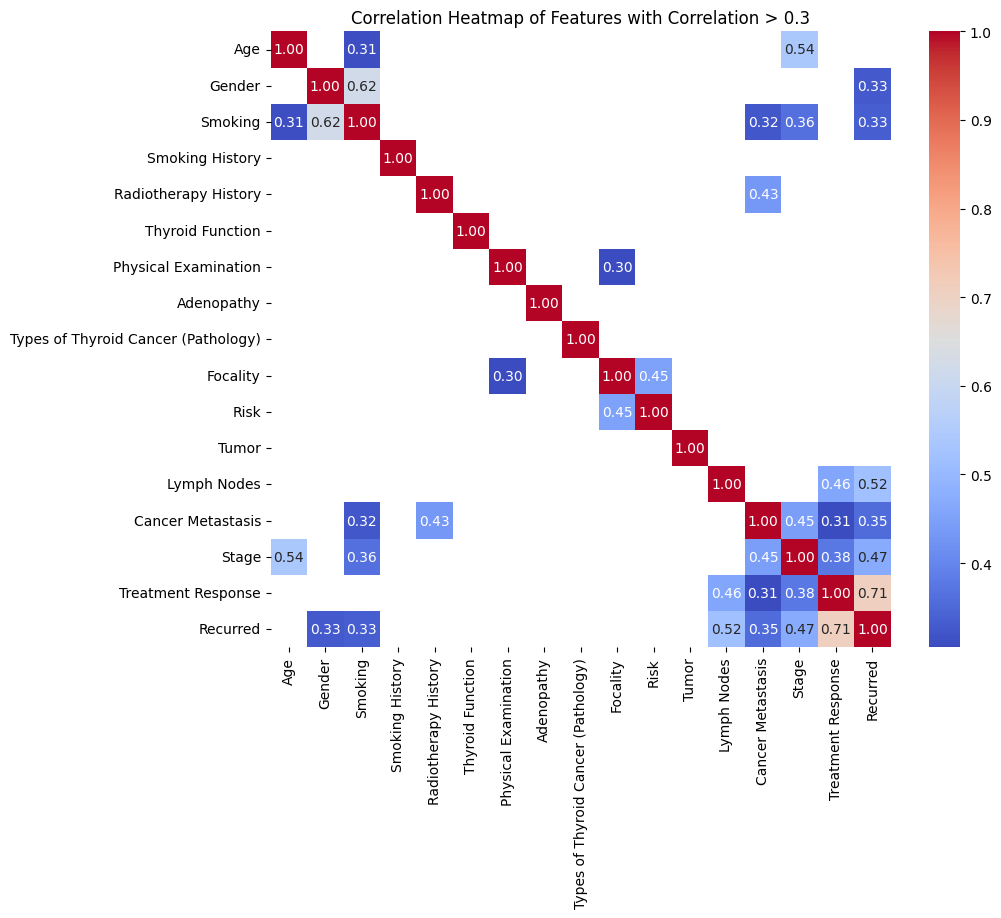

In [ ]:
# Ambang batas korelasi yang diinginkan
threshold = 0.3

# Filter matriks korelasi berdasarkan ambang batas
high_correlation_matrix = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix > 0)]

# Buat heatmap untuk matriks korelasi yang disaring
plt.figure(figsize=(10, 8))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap of Features with Correlation > {threshold}')
plt.show()


## **Data Splitting**

In [ ]:
X = df.drop(['Recurred'], axis=1)
y = df['Recurred']

In [ ]:
X.columns

Index(['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Types of Thyroid Cancer (Pathology)', 'Focality', 'Risk', 'Tumor',
       'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Treatment Response'],
      dtype='object')

In [ ]:
#Mmembagi data menjadi Data Training dan Data Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Menggunakan LabelEncoder terpisah untuk setiap kolom kategori pada X_train dan X_test
label_encoder_train = LabelEncoder()
label_encoder_test = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder_train.fit_transform(X_train[col])
        X_test[col] = label_encoder_test.fit_transform(X_test[col])

## **Random Forest**

In [ ]:
# Import library untuk RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Random Forest Classifier dengan parameter tertentu (misalnya, max_depth=5)
rf = RandomForestClassifier(max_depth=5, random_state=42)

# Melatih model pada data training
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Melakukan prediksi pada data training
rf_predicted_train = rf.predict(X_train)

# Melakukan prediksi pada data testing
rf_predicted_test = rf.predict(X_test)

# Menghitung confusion matrix untuk data training
rf_conf_matrix_train = confusion_matrix(y_train, rf_predicted_train)

# Menghitung confusion matrix untuk data testing
rf_conf_matrix_test = confusion_matrix(y_test, rf_predicted_test)

# Menampilkan confusion matrix untuk data training
print("Confusion Matrix (Data Training):")
print(rf_conf_matrix_train)
print("\n")

# Menghitung akurasi model untuk data training
rf_acc_score_train = accuracy_score(y_train, rf_predicted_train)

# Menampilkan akurasi model untuk data training
print("Accuracy of Random Forest Classifier (Data Training):", rf_acc_score_train * 100, '%\n')


# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data training
print("Classification Report (Data Training):")
print(classification_report(y_train, rf_predicted_train))

# Menampilkan confusion matrix untuk data testing
print("Confusion Matrix (Data Testing):")
print(rf_conf_matrix_test)
print("\n")

# Menghitung akurasi model untuk data testing
rf_acc_score_test = accuracy_score(y_test, rf_predicted_test)

# Menampilkan akurasi model untuk data testing
print("Accuracy of Random Forest Classifier (Data Testing):", rf_acc_score_test * 100, '%\n')

# Menampilkan laporan klasifikasi yang mencakup precision, recall, F1-score, dan support untuk data testing
print("Classification Report (Data Testing):")
print(classification_report(y_test, rf_predicted_test))


Confusion Matrix (Data Training):
[[217   0]
 [  6  83]]


Accuracy of Random Forest Classifier (Data Training): 98.0392156862745 %

Classification Report (Data Training):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       217
           1       1.00      0.93      0.97        89

    accuracy                           0.98       306
   macro avg       0.99      0.97      0.98       306
weighted avg       0.98      0.98      0.98       306

Confusion Matrix (Data Testing):
[[58  0]
 [ 1 18]]


Accuracy of Random Forest Classifier (Data Testing): 98.7012987012987 %

Classification Report (Data Testing):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



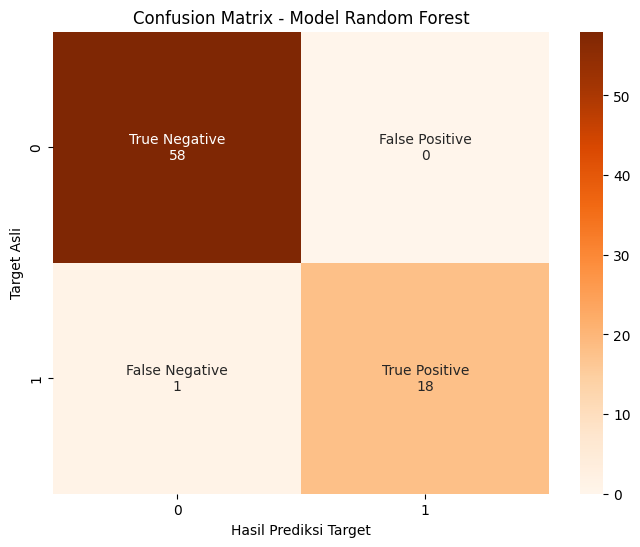

In [ ]:
# Menghitung jumlah TP, TN, FP, FN dari confusion matrix
TP = rf_conf_matrix_test[1, 1]
TN = rf_conf_matrix_test[0, 0]
FP = rf_conf_matrix_test[0, 1]
FN = rf_conf_matrix_test[1, 0]

# Membuat label untuk setiap kotak anotasi
labels = [f'True Negative\n{TN}', f'False Positive\n{FP}', f'False Negative\n{FN}', f'True Positive\n{TP}']

# Heatmap dengan persentase dan label yang sudah diperbaiki
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix_test, annot=np.reshape(labels, (2, 2)), fmt='', cmap='Oranges', cbar=True)
plt.title("Confusion Matrix - Model Random Forest")
plt.xlabel("Hasil Prediksi Target")
plt.ylabel("Target Asli")
plt.show()


# **Cross Validation**
digunakan untuk mengevaluasi kinerja model dan memastikan bahwa model tersebut dapat generalisasi dengan baik pada data yang tidak terlihat (unseen data)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
cvscore = cross_val_score(rf, X_train, y_train, cv =10, scoring = "accuracy")

In [ ]:
# Menampilkan nilai cross-validation scores
print("Cross-Validation Scores (10-fold):", cvscore)

# Menampilkan rata-rata dari nilai cross-validation scores
print("Rata-rata Cross-Validation Score:", cvscore.mean())

# Menampilkan standar deviasi dari nilai cross-validation scores
print("Standar Deviasi Cross-Validation Score:", cvscore.std())

Cross-Validation Scores (10-fold): [0.93548387 0.96774194 0.96774194 1.         0.90322581 0.93548387
 0.93333333 0.96666667 0.9        0.9       ]
Rata-rata Cross-Validation Score: 0.9409677419354839
Standar Deviasi Cross-Validation Score: 0.03237059226181594


<ipython-input-32-b58ea5609219>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cvscore, palette="Blues")


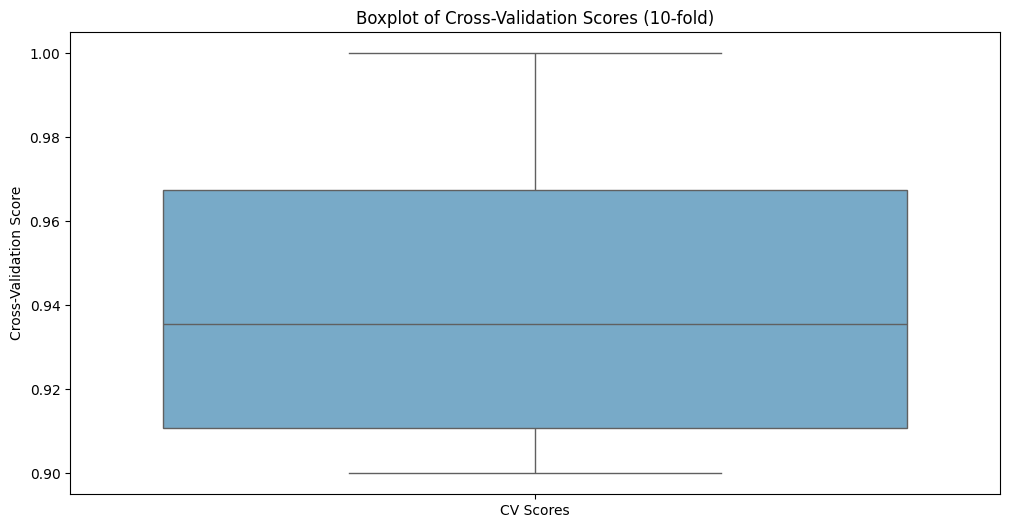

<ipython-input-32-b58ea5609219>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bar_data.keys()), y=list(bar_data.values()), palette="Blues")


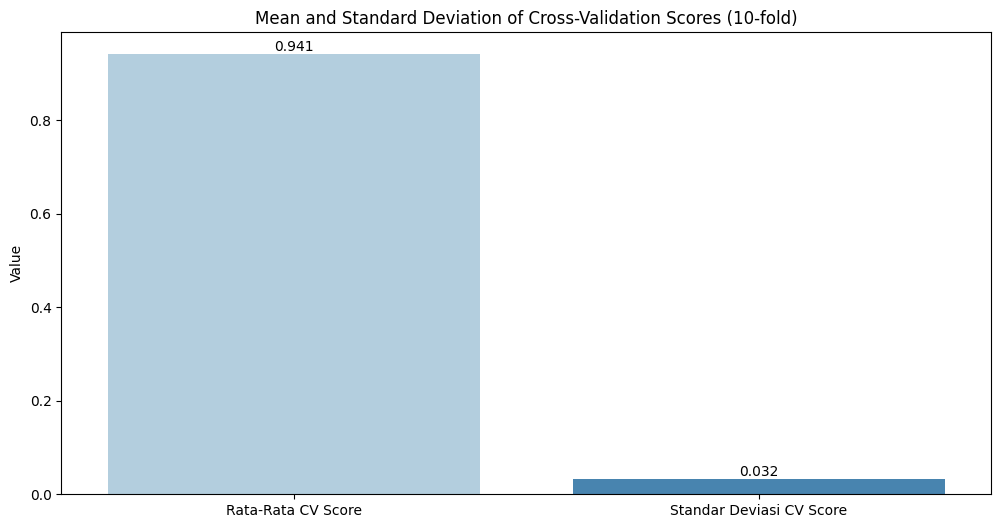

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cvscore, palette="Blues")
plt.title('Boxplot of Cross-Validation Scores (10-fold)')
plt.ylabel('Cross-Validation Score')
plt.xticks([0], ['CV Scores'])  # Memberi label pada sumbu x

# Menampilkan plot
plt.show()

# Bar Chart untuk Rata-rata dan Standar Deviasi Cross-Validation Scores
plt.figure(figsize=(12, 6))
mean_cv = cvscore.mean()
std_cv = cvscore.std()
bar_data = {'Rata-Rata CV Score': mean_cv, 'Standar Deviasi CV Score': std_cv}

# Menggunakan barplot dari seaborn
sns.barplot(x=list(bar_data.keys()), y=list(bar_data.values()), palette="Blues")

# Menambahkan nilai rata-rata dan standar deviasi pada puncak bar
for i, (key, value) in enumerate(bar_data.items()):
    plt.text(i, value + 0.001, f'{value:.3f}', ha='center', va='bottom')

plt.title('Mean and Standard Deviation of Cross-Validation Scores (10-fold)')
plt.ylabel('Value')

# Menampilkan plot
plt.show()

# **Hyperparameter Tuning**
hyperparameter tuning untuk memilih parameter yang memberikan kinerja terbaik untuk model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Tentukan daftar hyperparameters yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],     # Jumlah pohon keputusan dalam ensemble
    'max_depth': [None, 10, 20, 30],      # Maksimum kedalaman setiap pohon
    'min_samples_split': [2, 5, 10],      # Jumlah sampel minimum yang dibutuhkan untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]         # Jumlah sampel minimum yang dibutuhkan di setiap daun simpul
}

# Inisialisasi GridSearchCV dengan model Random Forest dan daftar hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Lakukan hyperparameter tuning pada data latih
grid_search.fit(X_train, y_train)

# Dapatkan semua hasil dari grid search
results = grid_search.cv_results_

# Konversi ke DataFrame untuk tampilan yang lebih baik
df_results = pd.DataFrame(results)
df_results = df_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending=False)

# Tambahkan kolom akurasi berdasarkan mean_test_score
df_results['Akurasi'] = df_results['mean_test_score']

# Tampilkan hasil
print("Hasil Grid Search untuk Model Random Forest:")
print(df_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'Akurasi']])


Hasil Grid Search untuk Model Random Forest:
    param_n_estimators param_max_depth param_min_samples_split  \
84                 100              30                       5   
3                  100            None                       5   
57                 100              20                       5   
0                  100            None                       2   
27                 100              10                       2   
..                 ...             ...                     ...   
75                 100              20                       5   
102                100              30                       5   
48                 100              10                       5   
18                 100            None                       2   
72                 100              20                       2   

    param_min_samples_leaf   Akurasi  
84                       1  0.957536  
3                        1  0.957536  
57                       1  0.957536  
0     

In [ ]:
from tabulate import tabulate
# Konversi ke DataFrame untuk tampilan yang lebih baik
df_results = pd.DataFrame(results)
df_results = df_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]
df_results = df_results.sort_values(by='mean_test_score', ascending=False)

# Tambahkan kolom akurasi berdasarkan mean_test_score
df_results['Akurasi'] = df_results['mean_test_score']

# Pilih kolom-kolom yang relevan dan ubah nama kolom untuk tampilan yang lebih baik
df_results = df_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'Akurasi']]
df_results.columns = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'Akurasi']

# Tampilkan hasil dalam bentuk tabel
print("Hasil Grid Search untuk Model Random Forest:")
print(tabulate(df_results, headers='keys', tablefmt='psql'))

Hasil Grid Search untuk Model Random Forest:
+-----+----------------+-------------+---------------------+--------------------+-----------+
|     |   n_estimators |   max_depth |   min_samples_split |   min_samples_leaf |   Akurasi |
|-----+----------------+-------------+---------------------+--------------------+-----------|
|  84 |            100 |          30 |                   5 |                  1 |  0.957536 |
|   3 |            100 |             |                   5 |                  1 |  0.957536 |
|  57 |            100 |          20 |                   5 |                  1 |  0.957536 |
|   0 |            100 |             |                   2 |                  1 |  0.957483 |
|  27 |            100 |          10 |                   2 |                  1 |  0.957483 |
|  81 |            100 |          30 |                   2 |                  1 |  0.957483 |
|  54 |            100 |          20 |                   2 |                  1 |  0.957483 |
|   5 |        

In [ ]:
# Tampilkan parameter terbaik dalam bentuk tabel
best_params_df = df_results.head(1)
print("Parameter dengan Akurasi Terbaik:")
print(tabulate(best_params_df, headers='keys', tablefmt='psql'))

Parameter dengan Akurasi Terbaik:
+----+----------------+-------------+---------------------+--------------------+-----------+
|    |   n_estimators |   max_depth |   min_samples_split |   min_samples_leaf |   Akurasi |
|----+----------------+-------------+---------------------+--------------------+-----------|
| 84 |            100 |          30 |                   5 |                  1 |  0.957536 |
+----+----------------+-------------+---------------------+--------------------+-----------+


# **Learning Curves**
 mengevaluasi kinerja sebuah model machine learning seiring dengan bertambahnya jumlah data pelatihan. Mereka membantu dalam memahami bagaimana model belajar dari data dan apakah model mengalami overfitting atau underfitting.

In [ ]:
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure() #membuat figur untuk menampilak plot learning
    plt.title("Learning curve model Random Forest")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

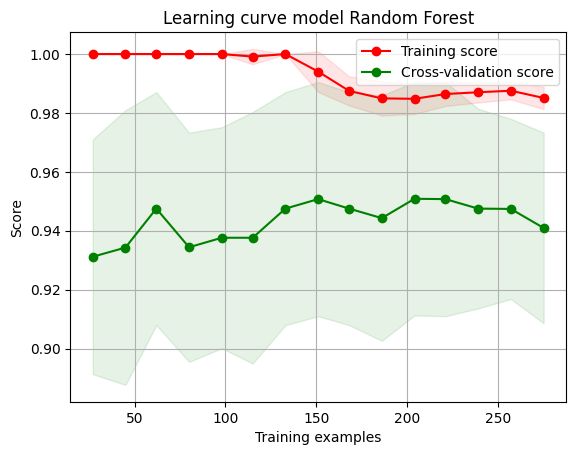

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
cv = 10
train_size=np.linspace(.1, 1.0, 15)
Learning_curve_model(X_train, y_train, rf, cv, train_size)

Perbedaan yang kecil antara kinerja model pada data pelatihan dan data pengujian menunjukkan bahwa model tidak mengalami overfitting atau underfitting, tetapi mampu mengenali pola dalam data dengan baik, yang dikenal sebagai good fit.

## **Kurva ROC (Receiver Operating characteristic)**
digunakan untuk mengevaluasi kinerja model klasifikasi dengan menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai threshold.

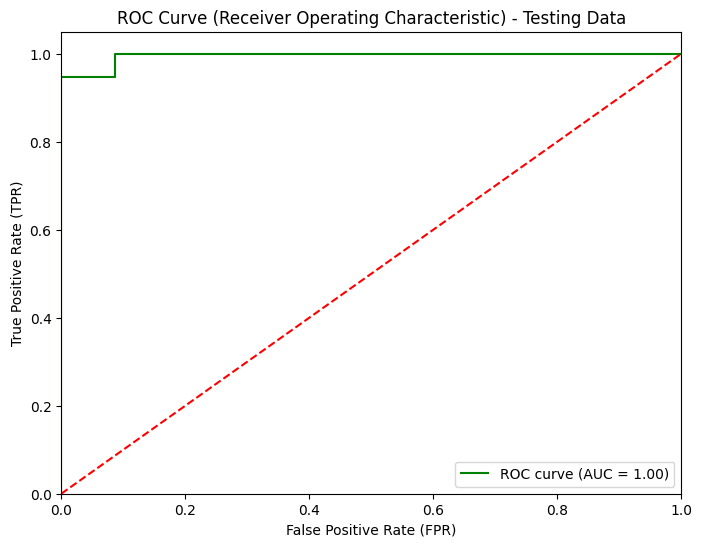

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mengembalikan y_test ke nilai biner (0 dan 1)
label_encoder_y = LabelEncoder()
y_test_binary = label_encoder_y.fit_transform(y_test)

# Menghitung nilai prediksi probabilitas untuk kelas positif (class 1) pada data testing
y_test_scores = rf.predict_proba(X_test)[:, 1]

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk data testing
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_scores, pos_label=1)

# Menghitung AUC untuk data testing
auc_test = roc_auc_score(y_test_binary, y_test_scores)

# Memplot kurva ROC untuk data testing
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label='ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Receiver Operating Characteristic) - Testing Data')
plt.legend(loc='lower right')
plt.show()


Nilai AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara sampel positif dan negatif